# Transforming Data and Optimizing ML Regression Models

**In this project, we will look into the Auto MPG dataset**


![A remote image](http://newvoiceoldcars.com/ebay/history/73-1800es/engine-r.jpg)




We will prepare data for machine learning and compare the performance of different machine learning regression models on the Auto-MPG data set. In this project, I have compared the 12 forms of regressions on the Auto-MPG data set. Each model has different predictive ability on the boundary of the training dataset. While Ridge regression allows you to analyze data even when severe multicollinearity is present and helps prevent overfitting, Lasso regression (least absolute shrinkage and selection operator) performs a variable selection that aims to increase prediction accuracy by identifying a simpler model. Each form has its own importance and a specific condition where they are best suited to apply. 

The following regression models will be studied:

*1. Ordinary Least Squares Regression*

*2. Stepwize Linear Regression*

*3. Principal Component Regression (PCA)*

*4. Partial Least Squares Regression*

*5. Ridge Regression*

*6. Random Forest Regression*

*7. Support Vector Regression*

*8. Lasso Regression*

*9.Decision Tree Regression*

*10. NO Bagging Regression*

*11. Quantile Regression*

*12. kNN Regression*

# 1. Loading the Data

We will use read.csv() function to load data which we were prepared before.

In [15]:
df<-read.csv("auto-mpg.csv")
dim(df)
head(df, 5)
str(df)

[1] 392  10

X,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino


'data.frame':	392 obs. of  10 variables:
 $ X           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ model_year  : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ car_name    : Factor w/ 301 levels "amc ambassador brougham",..: 49 36 230 14 160 141 54 222 240 2 ...


Before starting, we need to remove the character variables (country and cont) from the data using negative subscripts:

In [16]:
df<-df[c(-1)] #removing X
df<-df[c(-9)] #removing car_name
head(df, 5)

mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
18,8,307,130,3504,12.0,70,1
15,8,350,165,3693,11.5,70,1
18,8,318,150,3436,11.0,70,1
16,8,304,150,3433,12.0,70,1
17,8,302,140,3449,10.5,70,1


# 2. Data Transformation

We will visualize the data by creating a scatterplot of the data to see association, or correlation, between variables. 
In certain instances, it may appear that the relationship between the two variables is not linear; in such a case, a linear correlation analysis may still be appropriate. When performing a linear fit of mpg against weight or horsepower, for example, an appropriate transformation horsepower, weight, or both, can often significantly improve the correlation. A residual plot can reveal whether a data set follows a random pattern, or if a nonlinear relationship can be detected.

We will first look at coralation map and than scatterplot.

Loading required package: ggplot2


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
model_year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


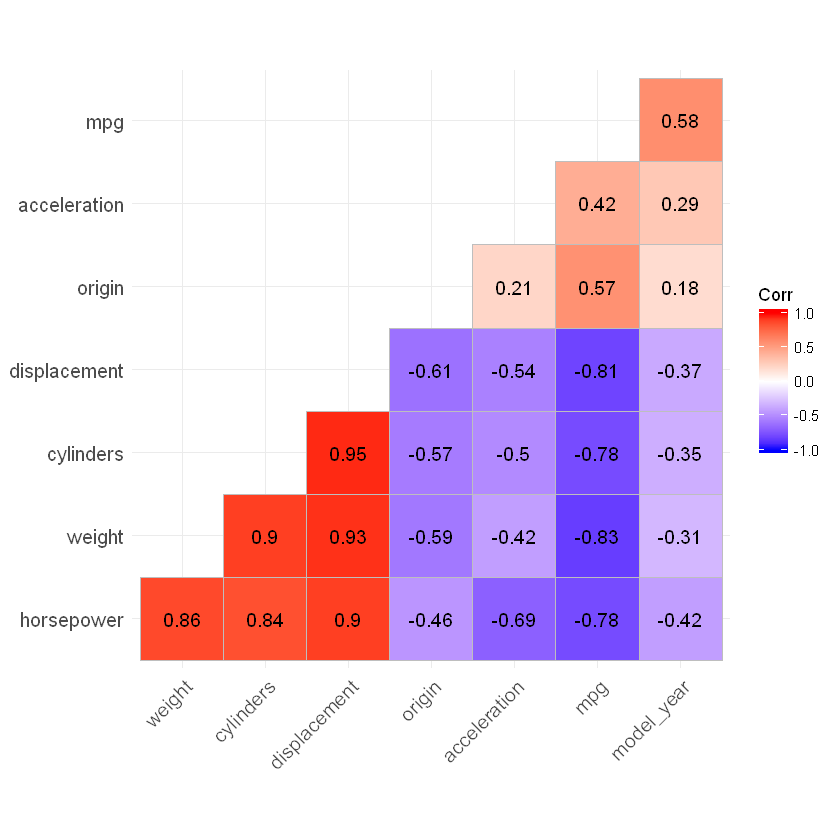

In [17]:
#install.packages("corrplot")
#install.packages("ggcorrplot")
library("ggcorrplot")
cor(df)
corr=cor(df)
ggcorrplot(corr, hc.order = TRUE, type = "lower",lab = TRUE)

Data visualization is the best way to see relationships between each pair of variables in the data frame.

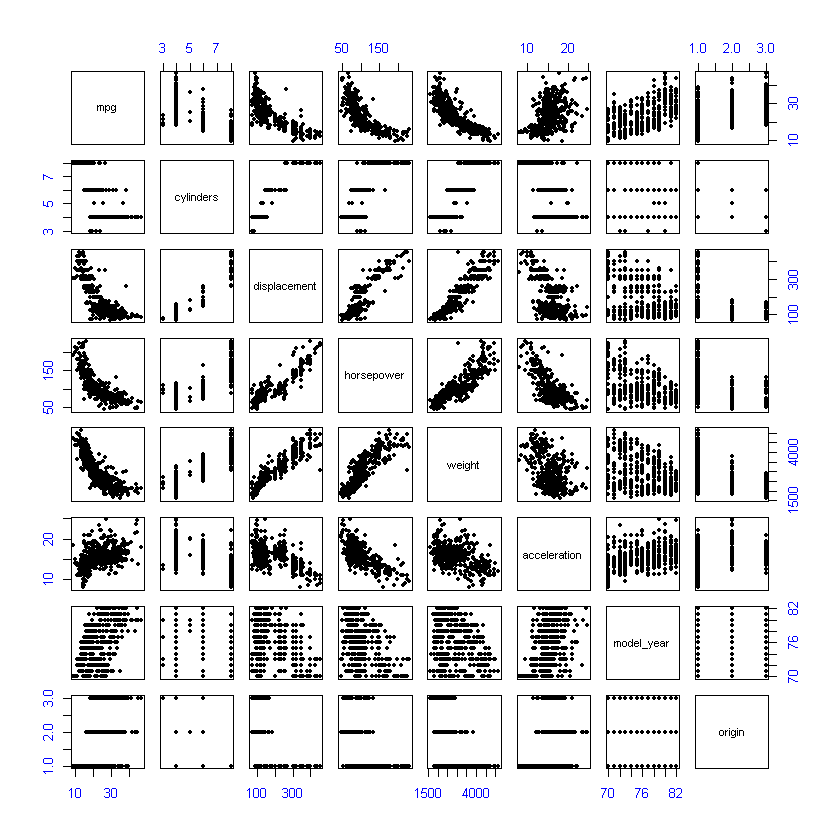

In [18]:
plot(df,col="black",cex=0.7, col.axis='blue', pch=16)

it can be seen from figures there is a linear correlation between displacement, horsepower, and weight. This multi correlation will cause multicollinearity. Multicollinearity is one of serious problems that should be resolved before starting the process of modeling the data. 

It can be seen from figure there are strong linear correlations between displacement, horsepower, and weight.

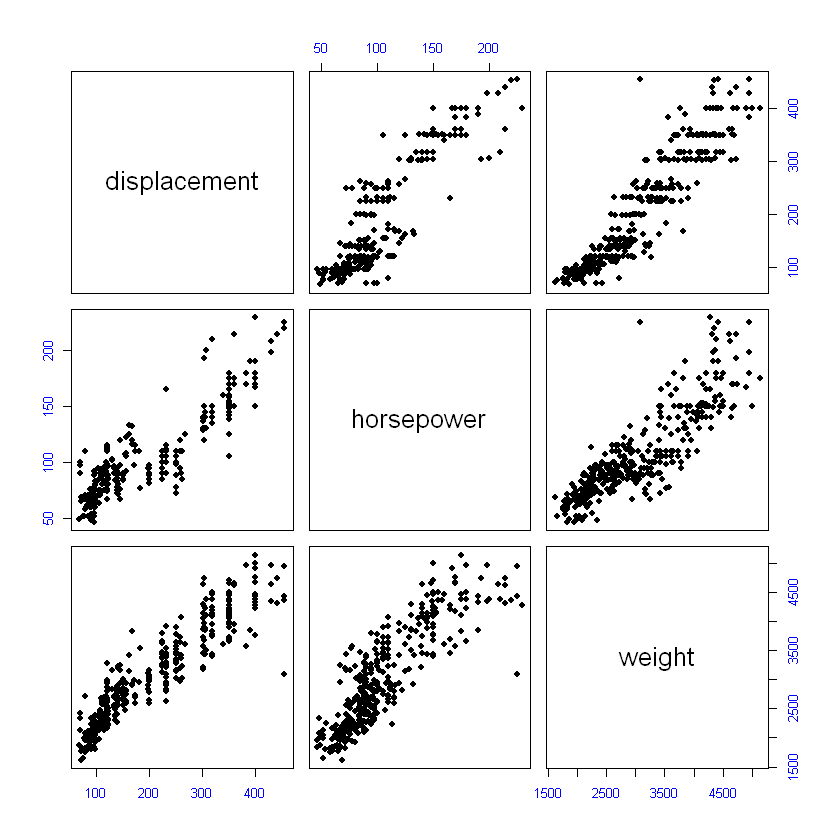

In [19]:
multicol<-df[3:5]
plot(multicol,col="black",cex=1, col.axis='blue', pch=19)

In the raw data as shown in Figures for horsepower-mpg, displacement-mpg, and weight-mpg have reciprocal transformation (y'=1/y). It might be useful if we transform them into the linear relationship, but we also have to consider the multicollinearity. Due to multicollinearity, We will only apply the Reciprocal model to displacement and weight variables for creating the linear relationship. This will help us to increase the linear relationship and decrease the multiclonality. Maybe we do not need to consider the multicollinearity problem for some regression models, because they had been created to predict these kinds of data which have multicollinearity.

In [20]:
df[['weight']]=1/(df[['weight']]) #reciprocal transformation
df[['displacement']]=(1/df[['displacement']]) #reciprocal transformation

We will apply logarithmic transformation to the mpg and horsepower to create a negative linear correlation. This method is called Power model of data transformation.

In [21]:
df[['horsepower']]=sqrt(log(df[['horsepower']]))
df[['mpg']]=sqrt(log(df[['mpg']])) # applying log() and sqrt(), mpg data will be transposed in a normal distribution

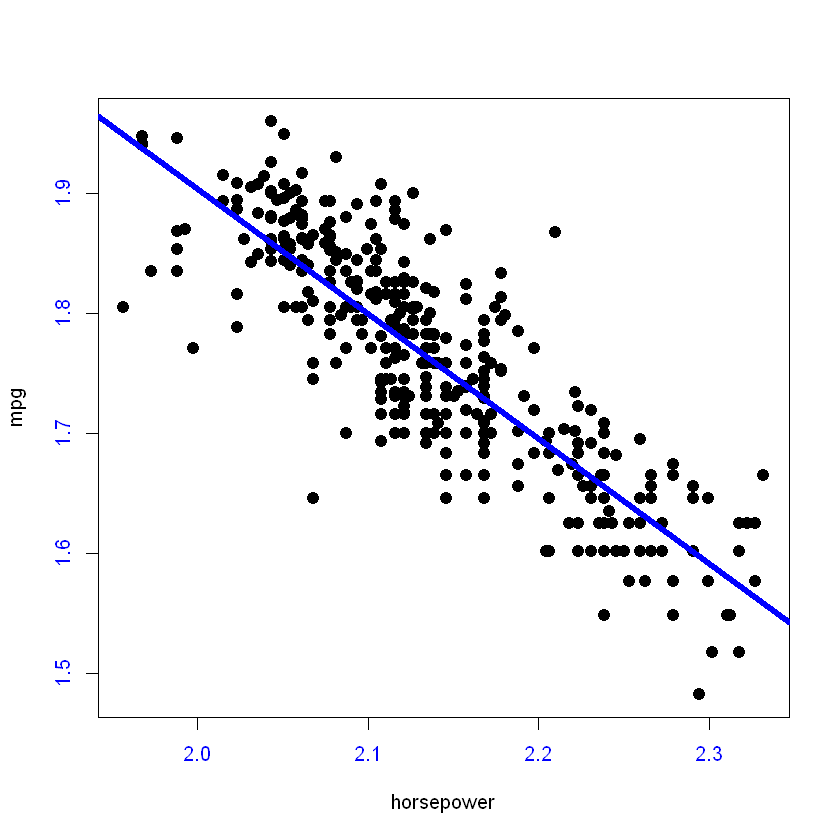

In [22]:
plot(df[c(4,1)], col="black",cex=2, col.axis='blue', pch=20) #it can be seen from scaterplot, there is a negative linear correlation.
abline(lm(df$mpg ~ df$horsepower), col="blue", lwd = 5)

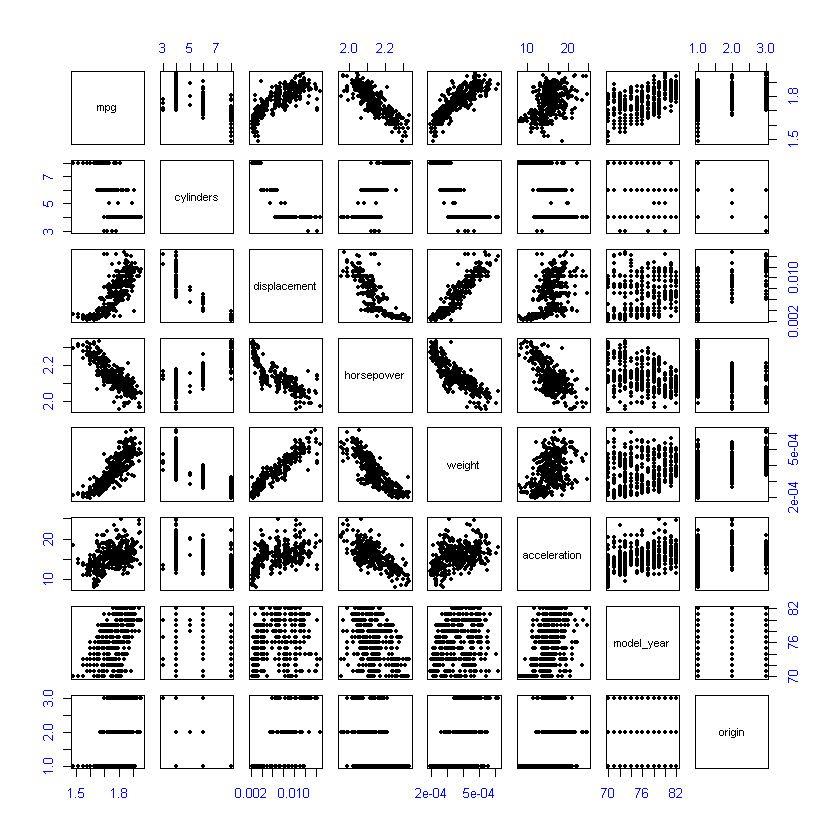

In [23]:
plot(df,col="black",cex=0.7, col.axis='blue', pch=16)

# 3. Splitting the Data

Below, the code that separates the data into inputs, x and output, y is provided.

In [24]:
#install.packages("caTools")
#Split data
set.seed(2)
library(caTools)#for sample.split() function 
split<-sample.split(df[0:7], SplitRatio = 0.7)

In [25]:
#we divided data in ratio 0.7
xtraining<-subset(df[c(-1)], split=="TRUE")
xtest<-subset(df[c(-1)], split=="FALSE")
ytraining<-subset(df[c(1)], split=="TRUE")
ytest<-subset(df[c(1)], split=="FALSE")

# 4. Optizing ML Regression Models

# *4. 1. Ordinary Least Squares (OLS) Regression *

Ordinary Least Squares (OLS) regression is a linear model that seeks to find a set of coefficients for a line/hyper-plane that minimise the sum of the squared errors.

In [125]:
#install.packages("car")
library(car)
# fit models
OLS_fit <- lm(ytraining$mpg~., xtraining)
# make predictions
OLS_predictions <- predict(OLS_fit, xtest)
# mse
OLS_mse <- mean((ytest$mpg - OLS_predictions)^2)
OLS_se <- ((ytest$mpg - OLS_predictions)^2)
# accuracy
compare <- cbind (actual=ytest$mpg, OLS_predictions)
compare=as.data.frame(compare)
OLS_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
OLS_accuracy<-round(mean(OLS_ACR), 2)
R2 <- 1 - (sum((ytest$mpg-OLS_predictions )^2)/sum((ytest$mpg-mean(ytest$mpg))^2))

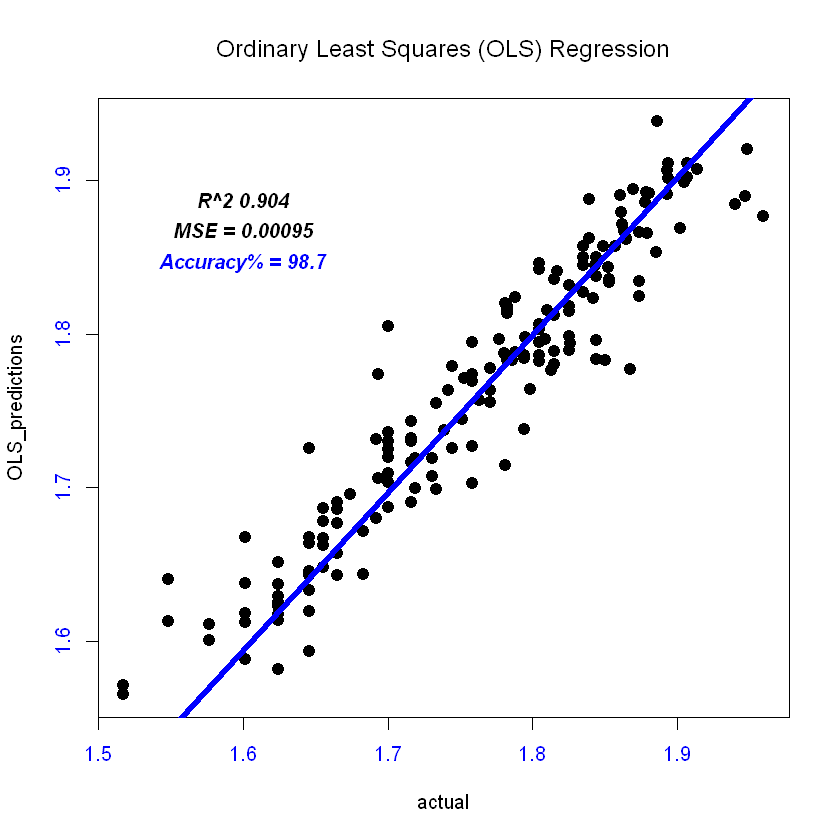

In [126]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("Ordinary Least Squares (OLS) Regression")))
abline(lm(compare$actual ~ compare$OLS_predictions), col="blue", lwd = 5)
text(x=1.6, y=1.9, labels = paste('R^2', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.88, labels = paste("MSE =", round(OLS_mse, 5)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.86, labels = paste("Accuracy% =", OLS_accuracy), pos = 1, font = 4, col='blue')


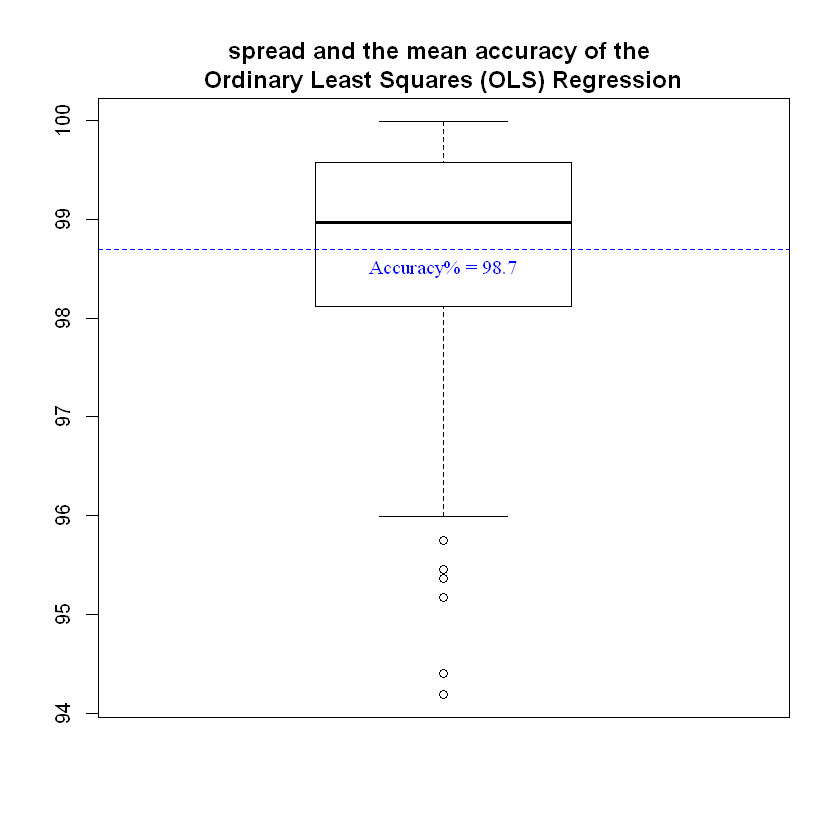

In [28]:
boxplot(ACR, main = substitute(paste("
spread and the mean accuracy of the 
Ordinary Least Squares (OLS) Regression")))
abline(h = OLS_accuracy, lty =2, col='blue')
text(OLS_accuracy,  labels = paste("Accuracy% =", round(OLS_accuracy, 3)),pos = 1, font = 6, col='blue')

As we mentioned before multicollinearity is important so we will use the Variance Inflation Factors vif() identifies correlation between independent variables and the strength of that correlation.

In [29]:
vif(OLS_fit)

cylinders displacement   horsepower       weight acceleration   model_year 
    5.400173    13.109633    11.731392    13.197321     3.363062     1.243786 
      origin 
    2.588062

the VIF score for the predictor variable cylinders, displacement, horsepower and weight are high. This might be problematic. The smallest possible value for VIF is 1, which indicates the complete absence of collinearity. Typically in practice there is a small amount of collinearity among the predictors. As a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity. When faced with the problem of collinearity, there are two simple solutions.

*1) The first is to drop one of the problematic variables from the regression.*

*2) Combine the collinear variables together into a single predictor.*

Combining different unit variables will decrease the accuracy and increase mse. In this case, we will apply the first solution. For that, we need to check variables importance. 

**We will use the varImp() function to check the variables importance.

In [30]:
library(caret)
#'List the chosen features'
varImp(OLS_fit)

Loading required package: lattice


,Overall
cylinders,3.446623
displacement,1.323216
horsepower,3.682654
weight,5.206942
acceleration,2.293784
model_year,12.069050
origin,1.205757


It can be seen from list the chosen features table (variable importance result), the displacement has lowest importance for the mpg prediction and displacement also has high coralation with horsepower and weight in this case we can remove the displacement from featurates

In [31]:
#we divided data in ratio 0.7
x1training<-subset(df[c(2,4,5,6,7,8)], split=="TRUE")
x1test<-subset(df[c(2,4,5,6,7,8)], split=="FALSE")
# fit model
OLS_fit1 <- lm(ytraining$mpg~., x1training)
# make predictions
OLS_predictions1 <- predict(OLS_fit1, x1test)
# mse
OLS_mse1 <- mean((ytest$mpg - OLS_predictions1)^2)
# accuracy
compare1 <- cbind (actual=ytest$mpg, OLS_predictions1)
compare1=as.data.frame(compare1)
ACR1<-(apply(compare1, 1, min)/apply(compare1, 1, max))*100
OLS_accuracy1<-round(mean(ACR1), 1)

In [32]:
R2 <- 1 - (sum((ytest$mpg-OLS_predictions1 )^2)/sum((ytest$mpg-mean(ytest$mpg))^2))
R2

[1] 0.9039195

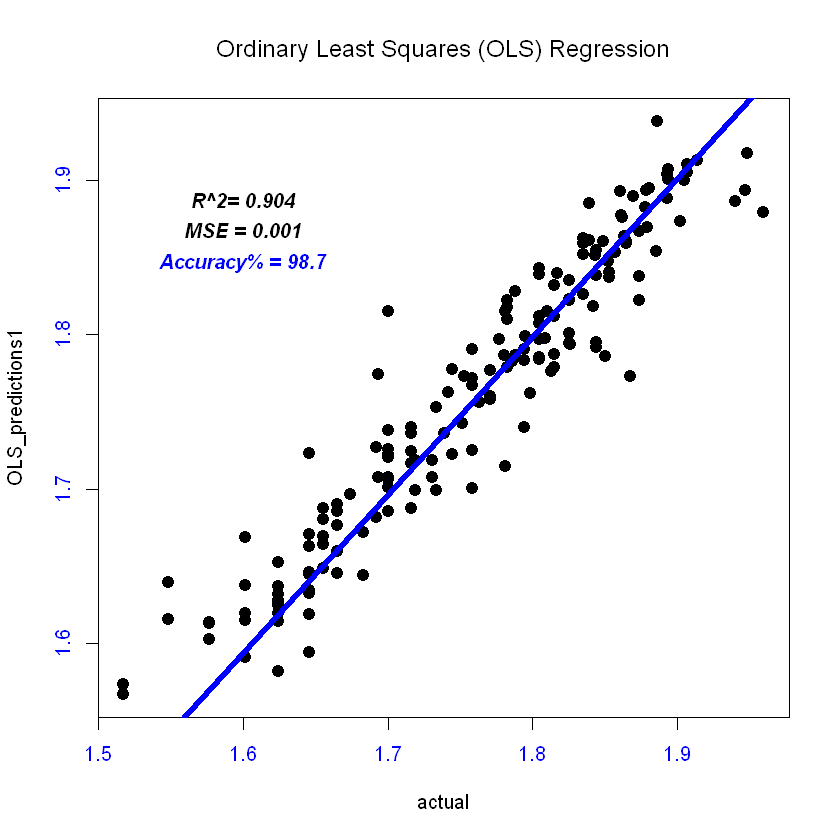

In [33]:
plot(compare1, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("Ordinary Least Squares (OLS) Regression")))
abline(lm(compare1$actual ~ compare1$OLS_predictions1), col="blue", lwd = 5)
text(x=1.6, y=1.9, labels = paste('R^2=', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.88, labels = paste("MSE =", round(OLS_mse1, 3)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.86, labels = paste("Accuracy% =", round(OLS_accuracy1, 3)), pos = 1, font = 4, col='blue')

# *4. 2. Stepwize Linear Regression (SLR)*

Stepwise Linear Regression is a method that makes use of linear regression to discover which subset of attributes in the dataset result in the best performing model. It is step-wise because each iteration of the method makes a change to the set of attributes and creates a model to evaluate the performance of the set.

In [127]:
# fit model
base_fit <- lm(ytraining$mpg~., xtraining) #Stepwize Linear Regression (SLR)
# perform step-wise feature selection
SLR_fit <- step(base_fit) #Stepwize Linear Regression (SLR)
# make predictions
SLR_predictions <- predict(SLR_fit, xtest)
# mse
SLR_mse <- mean((ytest$mpg - SLR_predictions)^2)
SLR_se <- ((ytest$mpg - SLR_predictions)^2)
# calculate accuracy
compare <- cbind (actual=ytest$mpg, SLR_predictions)
SLR_accuracy<-mean (apply(compare, 1, min)/apply(compare, 1, max))
compare=as.data.frame(compare)
SLR_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
SLR_accuracy<-round(mean(SLR_ACR), 2)
R2 <- 1 - (sum((ytest$mpg-SLR_predictions )^2)/sum((ytest$mpg-mean(ytest$mpg))^2))

Start:  AIC=-1501.36
ytraining$mpg ~ cylinders + displacement + horsepower + weight + 
    acceleration + model_year + origin

               Df Sum of Sq     RSS     AIC
- origin        1  0.001724 0.25780 -1501.8
- displacement  1  0.002076 0.25816 -1501.5
<none>                      0.25608 -1501.4
- acceleration  1  0.006238 0.26232 -1498.0
- cylinders     1  0.014084 0.27016 -1491.4
- horsepower    1  0.016079 0.27216 -1489.7
- weight        1  0.032143 0.28822 -1476.9
- model_year    1  0.172691 0.42877 -1387.9

Step:  AIC=-1501.85
ytraining$mpg ~ cylinders + displacement + horsepower + weight + 
    acceleration + model_year

               Df Sum of Sq     RSS     AIC
- displacement  1  0.000809 0.25861 -1503.2
<none>                      0.25780 -1501.8
- acceleration  1  0.006144 0.26395 -1498.6
- cylinders     1  0.013138 0.27094 -1492.7
- horsepower    1  0.014904 0.27271 -1491.3
- weight        1  0.032063 0.28987 -1477.6
- model_year    1  0.178179 0.43598 -1386.2

Step: 

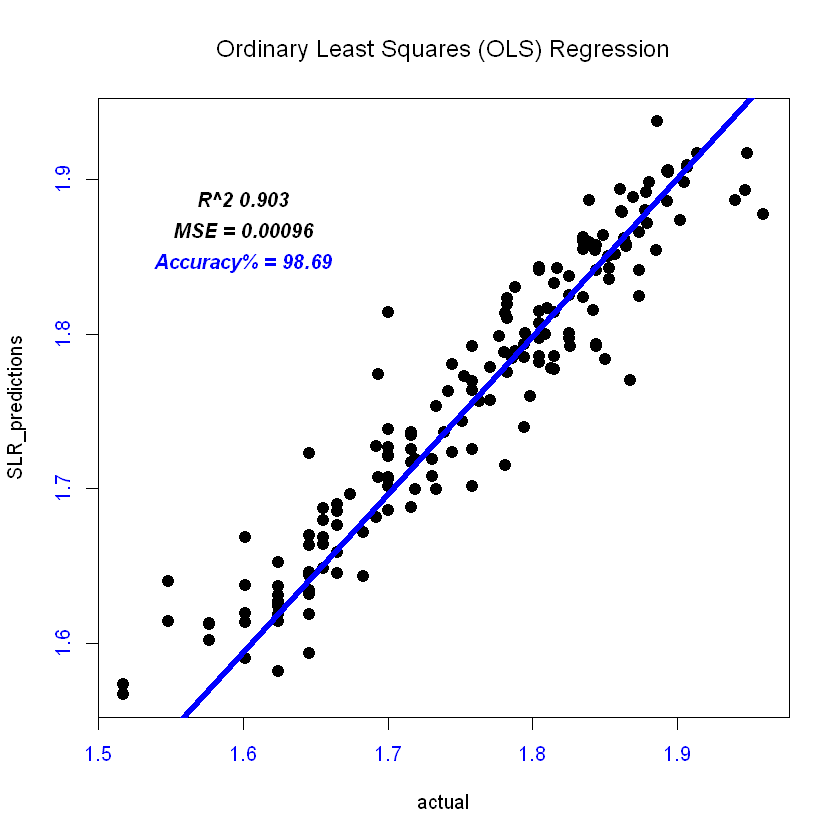

In [128]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("Ordinary Least Squares (OLS) Regression")))
abline(lm(compare$actual ~ compare$SLR_predictions), col="blue", lwd = 5)
text(x=1.6, y=1.9, labels = paste('R^2', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.88, labels = paste("MSE =", round(SLR_mse, 5)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.86, labels = paste("Accuracy% =", SLR_accuracy), pos = 1, font = 4, col='blue')


# 4.3. Principal Component Regression (PCR)

We can use PCR for solving the multicollinearity issue without dropping any variable.

Principal Component Regression (PCR) creates a linear regression model using the outputs of a Principal Component Analysis (PCA) to estimate the coefficients of the model. PCR is useful when the data has highly correlated predictors.

In [129]:
# load the package
#install.packages("pls")
library(pls)
# fit model
PCR_fit <- pcr(ytraining$mpg~., data=xtraining, validation="CV")
# make predictions
PCR_predictions <- predict(PCR_fit, xtest, ncomp=6)
#mse
PCR_mse <- mean((ytest$mpg - PCR_predictions)^2)
PCR_se <- ((ytest$mpg - PCR_predictions)^2)
# calculate accuracy
compare <- cbind (actual=ytest$mpg, PCR_predictions)
compare=as.data.frame(compare)
PCR_accuracy<-mean (apply(compare, 1, min)/apply(compare, 1, max))
PCR_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
PCR_accuracy<-round(mean(PCR_ACR), 2)
R2 <- 1 - (sum((ytest$mpg-PCR_predictions )^2)/sum((ytest$mpg-mean(ytest$mpg))^2))

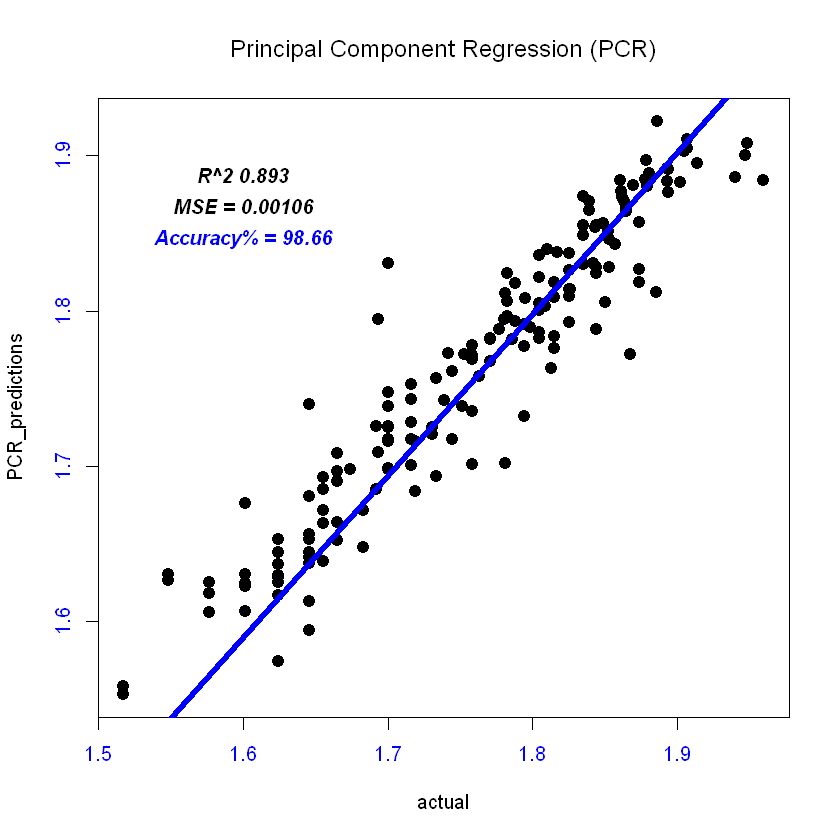

In [130]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("Principal Component Regression (PCR)")))
abline(lm(compare$actual ~ compare$PCR_predictions), col="blue", lwd = 5)
text(x=1.6, y=1.9, labels = paste('R^2', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.88, labels = paste("MSE =", round(PCR_mse, 5)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.86, labels = paste("Accuracy% =", PCR_accuracy), pos = 1, font = 4, col='blue')

In [ ]:
boxplot(ACR, main = substitute(paste("
spread and the mean accuracy of the 
Principal Component Regression (PCR)")))
abline(h = PCR_accuracy, lty =2, col='blue')
text(PCR_accuracy,  labels = paste("Accuracy% =", round(PCR_accuracy, 3)),pos = 1, font = 6, col='blue')

# *4.4. Partial Least Squares (PLS) Regression*

Partial Least Squares (PLS) Regression creates a linear model of the data in a transformed projection of problem space. Like PCR, PLS is appropriate for data with highly-correlated predictors.

In [234]:
# load the package
library(pls)
# fit model
PLS_fit <- plsr(ytraining$mpg~., data=xtraining, validation="CV")
# make predictions
PLS_predictions <- predict(PLS_fit, xtest, ncomp=7)
# summarize accuracy
PLS_mse<- mean((ytest$mpg-PLS_predictions)^2)
PLS_se<- ((ytest$mpg-PLS_predictions)^2)
# calculate accuracy
compare <- cbind (actual=ytest$mpg, PLS_predictions)
compare=as.data.frame(compare)
PLS_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
PLS_accuracy<-round(mean(PLS_ACR), 2)
R2 <- 1 - (sum((ytest$mpg-PLS_predictions )^2)/sum((ytest$mpg-mean(ytest$mpg))^2))

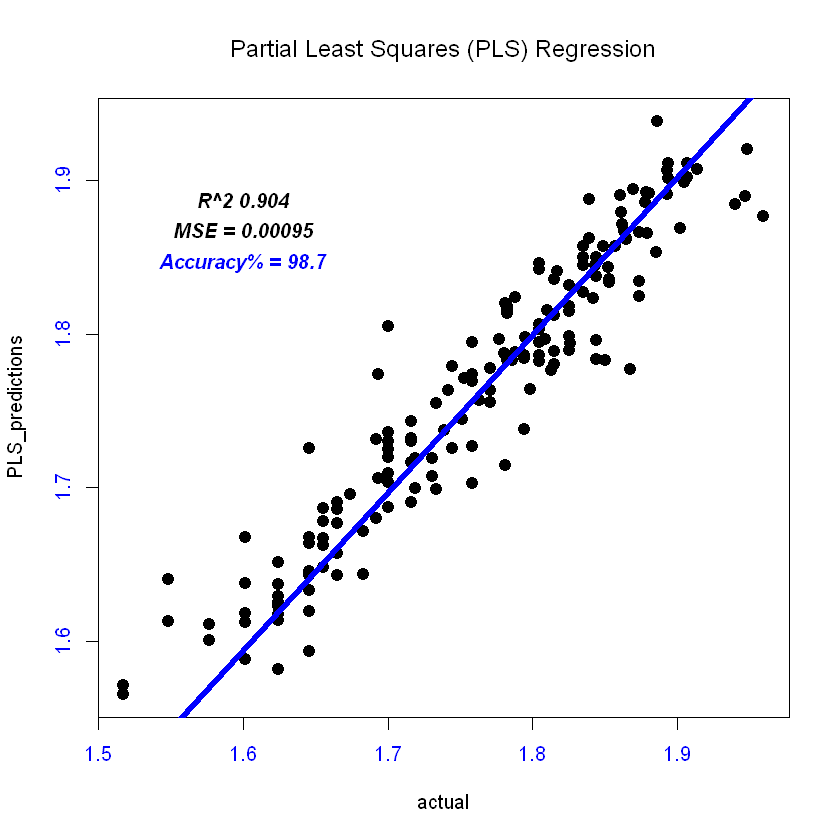

In [132]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("Partial Least Squares (PLS) Regression")))
abline(lm(compare$actual ~ compare$PLS_predictions), col="blue", lwd = 5)
text(x=1.6, y=1.9, labels = paste('R^2', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.88, labels = paste("MSE =", round(PLS_mse, 5)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.86, labels = paste("Accuracy% =", PLS_accuracy), pos = 1, font = 4, col='blue')

# *4.5. Ridge Regression*

Ridge Regression is a remedial measure taken to alleviate multicollinearity among regression predictor variables in a model.

In [72]:
#install.packages('ridge') #for Ridge Regression
library(ridge) #for Ridge Regression

In [235]:
RR_fit<-linearRidge(ytraining$mpg~., data=xtraining)
# make predictions
RR_predictions <- predict(RR_fit, xtest, ncomp=6)
# summarize accuracy
RR_mse <- mean((ytest$mpg-predictions)^2)
RR_se <- ((ytest$mpg-predictions)^2)
# calculate accuracy
compare <- cbind (actual=ytest$mpg, RR_predictions)
compare=as.data.frame(compare)
RR_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
RR_accuracy<-round(mean(RR_ACR), 2)
R2 <- 1 - (sum((ytest$mpg-RR_predictions )^2)/sum((ytest$mpg-mean(ytest$mpg))^2))

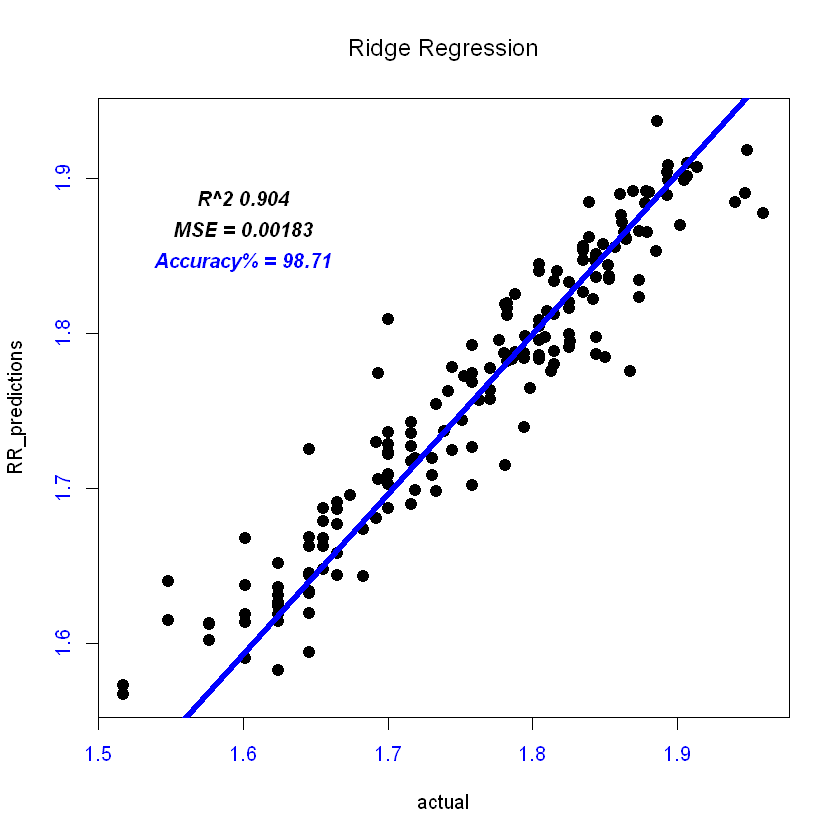

In [134]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("Ridge Regression")))
abline(lm(compare$actual ~ compare$RR_predictions), col="blue", lwd = 5)
text(x=1.6, y=1.9, labels = paste('R^2', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.88, labels = paste("MSE =", round(RR_mse, 5)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.86, labels = paste("Accuracy% =", RR_accuracy), pos = 1, font = 4, col='blue')

# *4.6. Random Forest Regression*

In [135]:
library(randomForest) #Random Forest Regression

In [236]:
RFR_fit <- randomForest(ytraining$mpg~., data=xtraining)
# make predictions
RFR_predict<- predict(RFR_fit, xtest)
# summarize accuracy
RFR_mse<- mean((ytest$mpg - RFR_predict)^2)
RFR_se<-((ytest$mpg - RFR_predict)^2)
# calculate accuracy
compare <- cbind (actual=ytest$mpg, RFR_predict)
compare=as.data.frame(compare)
RFR_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
RFR_accuracy<-round(mean(RFR_ACR), 2)
R2 <- 1 - (sum((ytest$mpg-RFR_predict )^2)/sum((ytest$mpg-mean(ytest$mpg))^2))

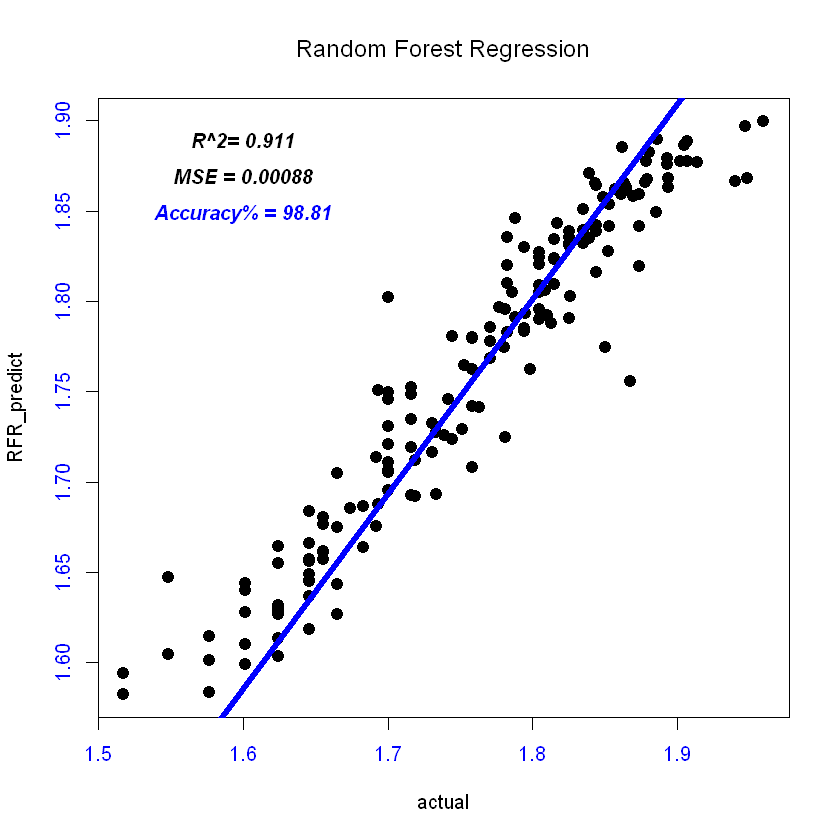

In [137]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("Random Forest Regression")))
abline(lm(compare$actual ~ compare$RFR_predict), col="blue", lwd = 5)
text(x=1.6, y=1.9, labels = paste('R^2=', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.88, labels = paste("MSE =", round(RFR_mse, 5)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.86, labels = paste("Accuracy% =", RFR_accuracy), pos = 1, font = 4, col='blue')

## found most importance featurates
importance(fit)
varImpPlot(fit)

# *4.7. Support Vector Regression (SVR)*

In [78]:
## Fit SVR model and visualize using scatter plot

#Install Package
#install.packages("e1071") #for Support Vector Regression (SVR)

In [79]:
#Load Library
library(e1071)

In [244]:
svm_model <- svm(ytraining$mpg~ ., data=xtraining, method="C-classification", kernel="linear")
# make predictions
svm_predictions <- predict(svm_model, xtest)
# summarize accuracy
svm_mse<- mean((ytest$mpg - svm_predictions)^2)
svm_se<- ((ytest$mpg - svm_predictions)^2)
# calculate accuracy
compare <- cbind (actual=ytest$mpg, svm_predictions)
compare=as.data.frame(compare)
svm_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
svm_accuracy<-round(mean(svm_ACR), 2)
R2 <- 1 - (sum((ytest$mpg-svm_predictions )^2)/sum((ytest$mpg-mean(ytest$mpg))^2))

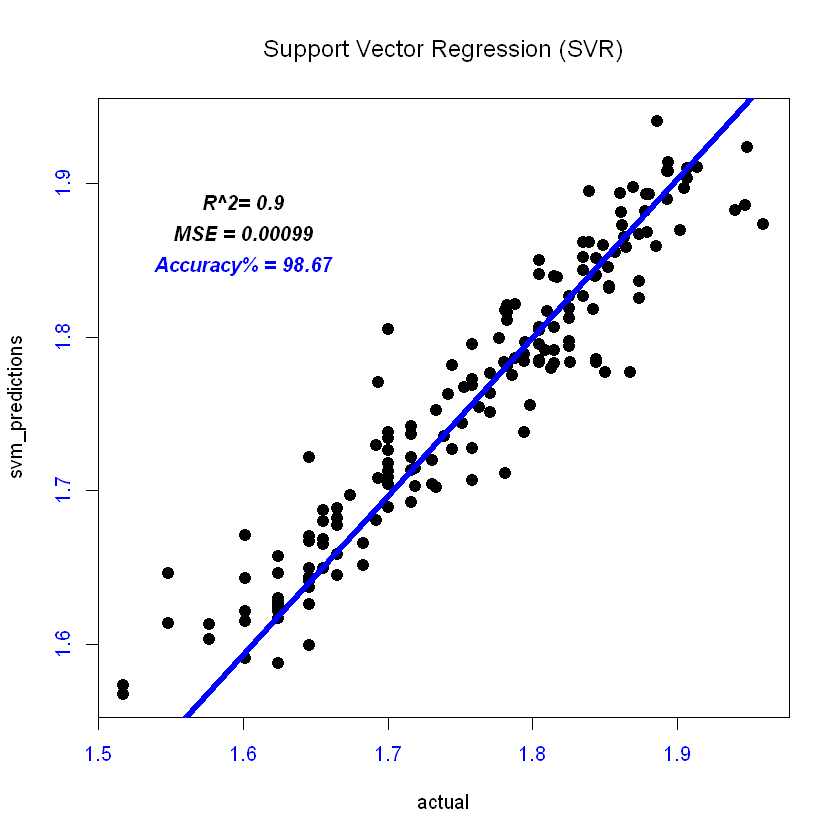

In [139]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("Support Vector Regression (SVR)")))
abline(lm(compare$actual ~ compare$svm_predict), col="blue", lwd = 5)
text(x=1.6, y=1.9, labels = paste('R^2=', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.88, labels = paste("MSE =", round(svm_mse, 5)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.86, labels = paste("Accuracy% =", svm_accuracy), pos = 1, font = 4, col='blue')

# *4.8. LASSO Regression*

In [82]:
#install.packages("glmnet", repos = "http://cran.us.r-project.org") #for LASSO Regression

In [140]:
library(glmnet)

In [141]:
# Data = considering that we have a data frame named dataF, with its first column being the class
x <- as.matrix(xtraining) # Removes class
y <- ytraining$mpg # Only class
lambda <- 10^seq(10, -2, length = 100)
lasso_fit <- glmnet(x, y, alpha = 0, lambda = lambda)

[1] 0.008902508

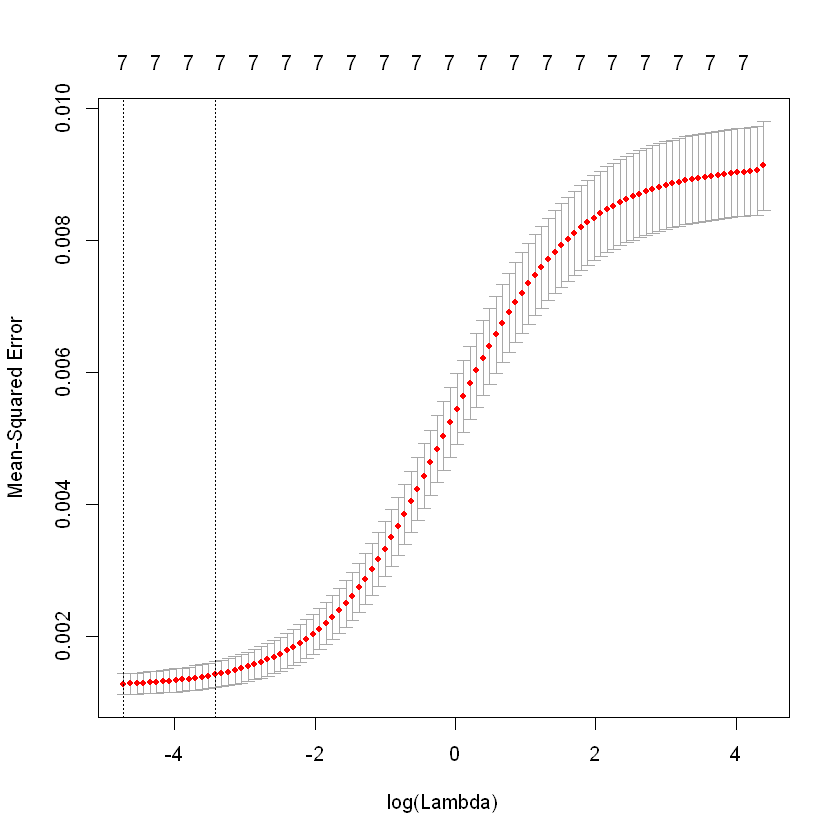

In [142]:
set.seed(1)
cv.out=cv.glmnet(x,y,alpha=0)
plot(cv.out)
bestlam=cv.out$lambda.min
bestlam

In [238]:
testx <- as.matrix(xtest) # Removes class
lasso_predictions <- predict(lasso_fit, s = bestlam, newx = testx)
# summarize accuracy
lasso_mse<- mean((ytest$mpg - lasso_predictions)^2)
lasso_se<- ((ytest$mpg - lasso_predictions)^2)
# calculate accuracy
compare <- cbind (actual=ytest$mpg, lasso_pred=lasso_predictions)
compare=as.data.frame(compare)
lasso_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
lasso_accuracy<-round(mean(lasso_ACR), 2)
R2 <- 1 - (sum((ytest$mpg-lasso_predictions )^2)/sum((ytest$mpg-mean(ytest$mpg))^2))

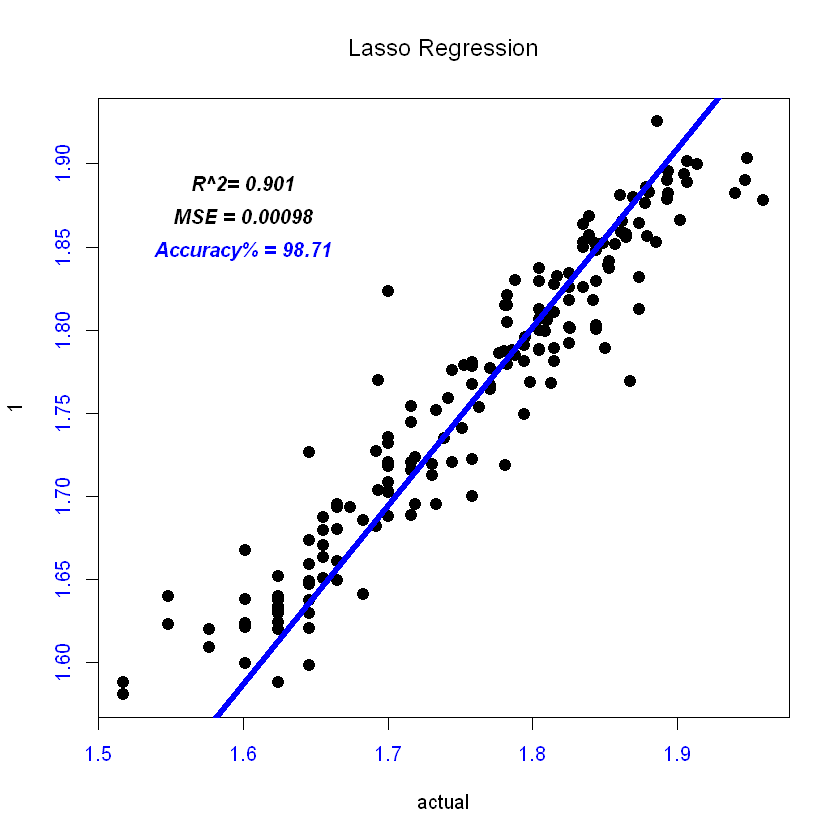

In [144]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("Lasso Regression")))
abline(lm(compare), col="blue", lwd = 5)
text(x=1.6, y=1.9, labels = paste('R^2=', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.88, labels = paste("MSE =", round(lasso_mse, 5)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.86, labels = paste("Accuracy% =", lasso_accuracy), pos = 1, font = 4, col='blue')

# 4.9. decision tree regression


Regression tree:
rpart(formula = ytraining$mpg ~ ., data = xtraining, method = "anova")

Variables actually used in tree construction:
[1] horsepower model_year weight    

Root node error: 2.0378/224 = 0.0090975

n= 224 

        CP nsplit rel error  xerror     xstd
1 0.618260      0   1.00000 1.01166 0.076276
2 0.091605      1   0.38174 0.41469 0.042317
3 0.063371      2   0.29014 0.34925 0.041962
4 0.049222      3   0.22676 0.28999 0.034012
5 0.020937      4   0.17754 0.25247 0.031159
6 0.013261      5   0.15661 0.25318 0.030875
7 0.010564      6   0.14335 0.23448 0.029196
8 0.010000      7   0.13278 0.20898 0.026068


ERROR: Error in summary(DT_Rfit): object 'DT_Rfit' not found


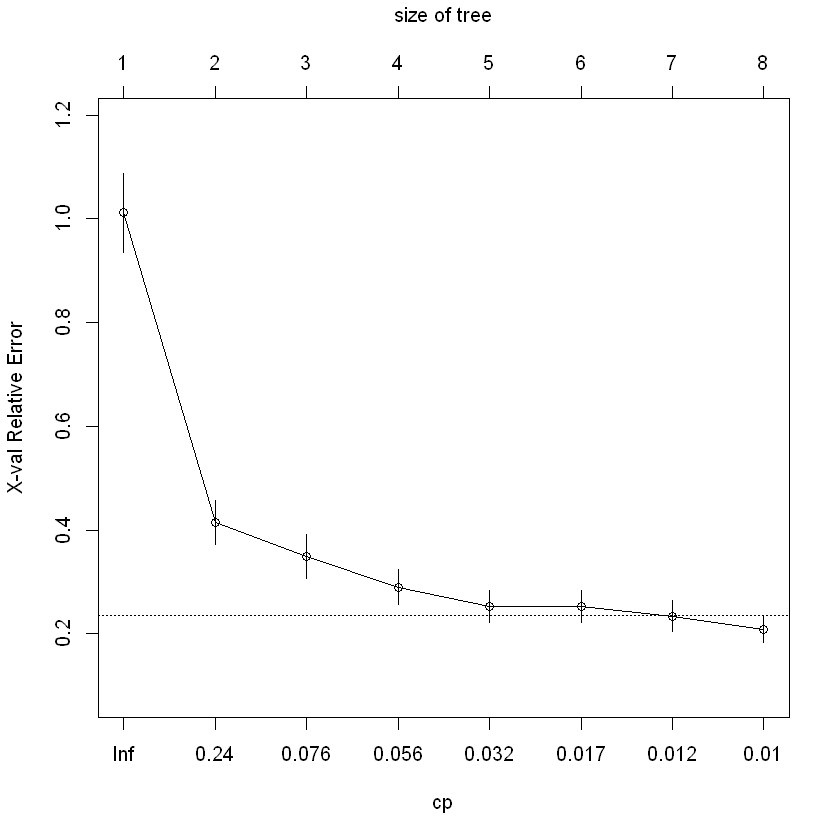

In [145]:
# Classification Tree with rpart
library(rpart)
# fit model
DTR_fit <- rpart(ytraining$mpg~., xtraining, method="anova")
printcp(DTR_fit) # display the results 
plotcp(DTR_fit) # visualize cross-validation results 
summary(DT_Rfit) # detailed summary of splits

In [239]:
DTR_predictions <- predict(DTR_fit, xtest)
# summarize accuracy
DTR_mse<- mean((ytest$mpg - DTR_predictions)^2)
DTR_se<- ((ytest$mpg - DTR_predictions)^2)
# calculate accuracy
compare <- cbind (actual=ytest$mpg, DTR_predictions)
compare <- cbind (actual=ytest$mpg, DTR_predictions)
compare=as.data.frame(compare)
DTR_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
DTR_accuracy<-round(mean(DTR_ACR), 2)
R2 <- 1 - (sum((ytest$mpg-DTR_predictions )^2)/sum((ytest$mpg-mean(ytest$mpg))^2))

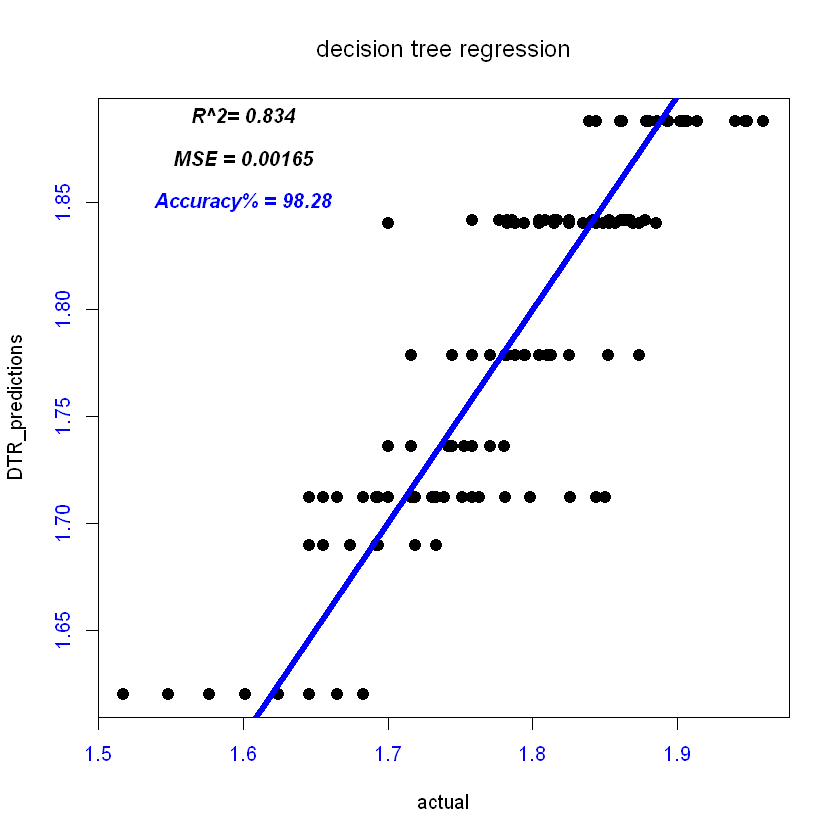

In [147]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("decision tree regression")))
abline(lm(compare), col="blue", lwd = 5)
text(x=1.6, y=1.9, labels = paste('R^2=', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.88, labels = paste("MSE =", round(DTR_mse, 5)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.86, labels = paste("Accuracy% =", DTR_accuracy), pos = 1, font = 4, col='blue')

# 4.10 Quantile Regression

Quantile regression is the extension of linear regression and we generally use it when outliers, high skeweness and heteroscedasticity exist in the data.
In linear regression, we predict the mean of the dependent variable for given independent variables. Since mean does not describe the whole distribution, so modeling the mean is not a full description of a relationship between dependent and independent variables. So we can use quantile regression which predicts a quantile (or percentile) for given independent variables.

Advantages of Quantile over Linear Regression

#Quite beneficial when heteroscedasticity is present in the data.

#Robust to outliers

#Distribution of dependent variable can be described via various quantiles.

#It is more useful than linear regression when the data is skewed.

In [91]:
#install.packages("quantreg")
library(quantreg) #for Quantile Regression

In [240]:
QR_fit<- rq(ytraining$mpg~.,xtraining,tau = 0.48) 
QR_predictions <- predict(QR_fit, xtest)
# mse
QR_mse<- mean((ytest$mpg - QR_predictions)^2)
QR_se<- ((ytest$mpg - QR_predictions)^2)
# calculate accuracy
compare <- cbind (actual=ytest$mpg, QR_predictions)
compare=as.data.frame(compare)
QR_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
QR_accuracy<-round(mean(QR_ACR), 2)
R2 <- 1 - (sum((ytest$mpg-QR_predictions )^2)/sum((ytest$mpg-mean(ytest$mpg))^2))

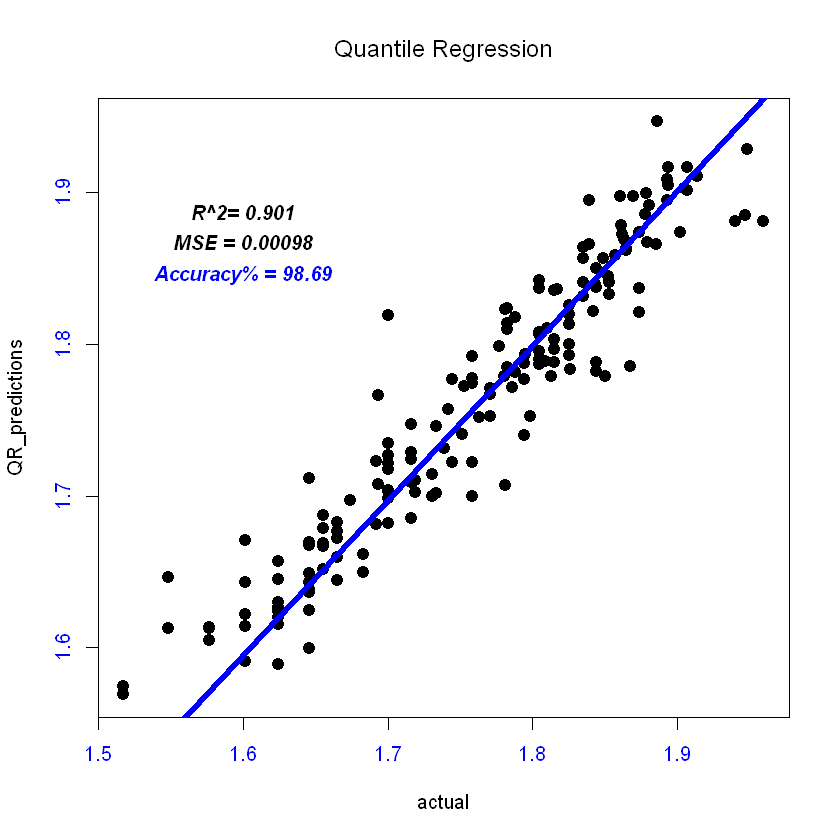

In [149]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("Quantile Regression")))
abline(lm(compare), col="blue", lwd = 5)
text(x=1.6, y=1.9, labels = paste('R^2=', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.88, labels = paste("MSE =", round(QR_mse, 5)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.86, labels = paste("Accuracy% =", QR_accuracy), pos = 1, font = 4, col='blue')

# 4.11. knn Regression

In [94]:
#install.packages("FNN")
library(FNN)

In [95]:
library(ISLR)
library(class)
library(MASS)

In [241]:
knn_fit <- knnreg( xtraining, ytraining$mpg,k = 3)
predictions <-predict(knn_fit, xtest)
# mse
kNN_mse<- mean((ytest$mpg - predictions)^2)
kNN_se<- ((ytest$mpg - predictions)^2)
# calculate accuracy
compare <- cbind (actual=ytest$mpg, predictions)
compare=as.data.frame(compare)
kNN_ACR<-(apply(compare, 1, min)/apply(compare, 1, max))*100
kNN_accuracy<-round(mean(kNN_ACR), 2)
R2 <- 1 - (sum((ytest$mpg-predictions )^2)/sum((ytest$mpg-mean(ytest$mpg))^2))

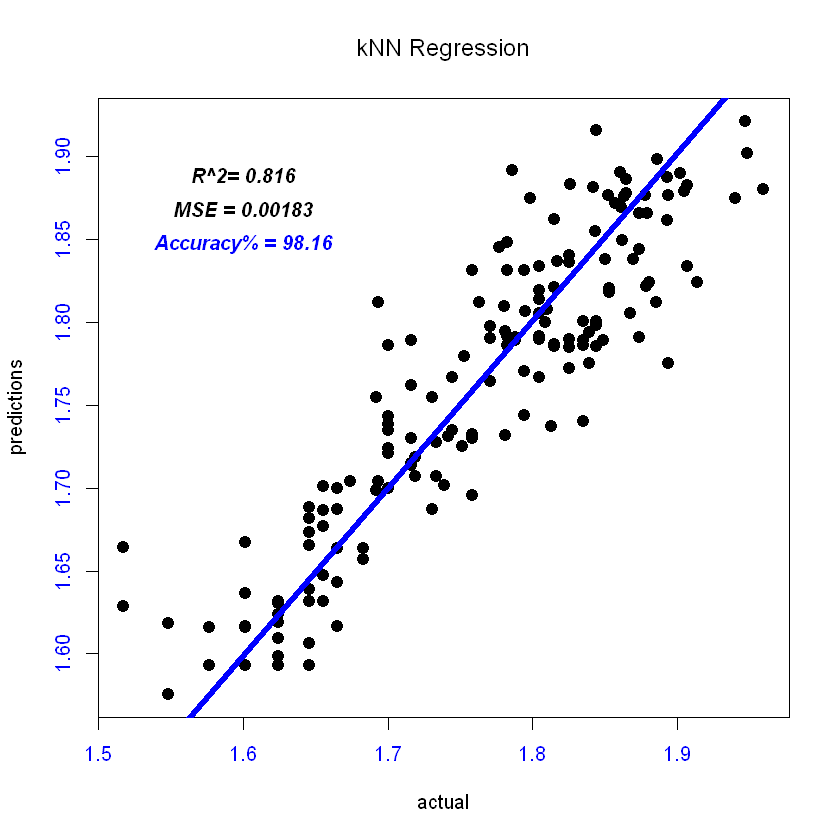

In [151]:
plot(compare, col="black",cex=2, col.axis='blue', pch=20, main = substitute(
    paste("kNN Regression")))
abline(lm(compare), col="blue", lwd = 5)
text(x=1.6, y=1.9, labels = paste('R^2=', round(R2, 3)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.88, labels = paste("MSE =", round(kNN_mse, 5)), pos = 1, font = 4, col='black')
text(x=1.6, y=1.86, labels = paste("Accuracy% =", kNN_accuracy), pos = 1, font = 4, col='blue')

# 5. Compare the Models

In [222]:
Models <- matrix(c(OLS_mse,SLR_mse, PCR_mse, PLS_mse, RR_mse, RFR_mse, svm_mse, lasso_mse, DTR_mse,QR_mse, kNN_mse, OLS_accuracy, SLR_accuracy, PCR_accuracy, PLS_accuracy, RR_accuracy, RFR_accuracy, svm_accuracy, lasso_accuracy, DTR_accuracy, QR_accuracy, kNN_accuracy), ncol=11,byrow=TRUE)
colnames(Models) <- c("OLS","SLR","PCR","PLS" ,"RR", "RFR", "svm", "Lasso","DTR", "QR", "kNN")
rownames(Models) <- c("mse","accuracy")
Models <- as.table(Models)
comp_mse<-Models[1,1:11]
comp_accuracy<-Models[2,1:11]

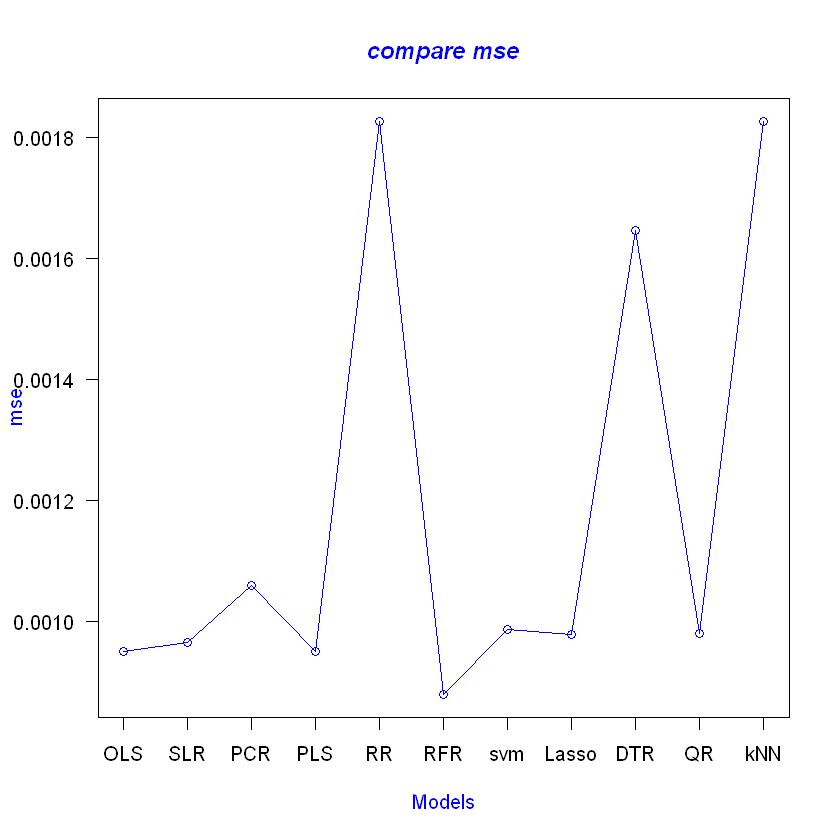

In [223]:
# annotations (axis labels) so we can specify them ourself
plot(comp_mse, las=1, type="o", col="blue",axes=FALSE, ann=FALSE)
# Make x axis using Mon-Fri labels
axis(1, at=1:11, lab=colnames(Models))
# Make y axis with horizontal labels that display ticks at 
# every 4 marks. 4*0:g_range[2] is equivalent to c(0,4,8,12).
axis(2, las=1)
# Create box around plot
box()
# Create a title with a red, bold/italic font
title(main="compare mse", col.main="blue", font.main=4)
# Label the x and y axes with dark green text
title(xlab="Models", col.lab='blue')
title(ylab="mse", col.lab='blue')

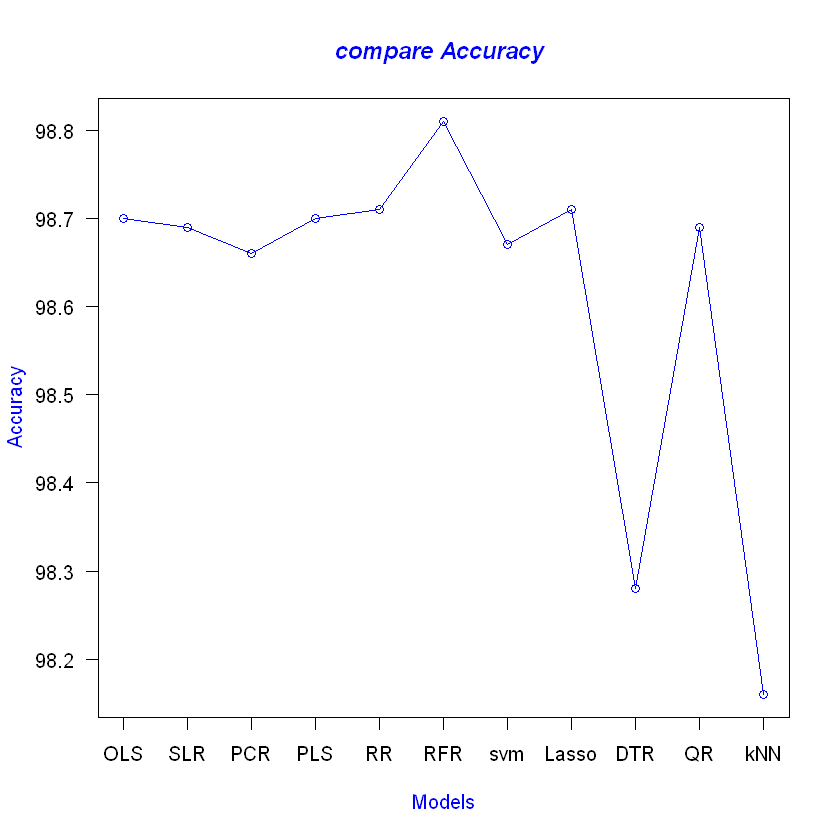

In [224]:
# annotations (axis labels) so we can specify them ourself
plot(comp_accuracy, type="o", col="blue",axes=FALSE, ann=FALSE)
# Make x axis using Mon-Fri labels
axis(1, at=1:11, lab=colnames(Models))
# Make y axis with horizontal labels that display ticks at 
# every 4 marks. 4*0:g_range[2] is equivalent to c(0,4,8,12).
axis(2, las=1)
# Create box around plot
box()
# Create a title with a red, bold/italic font
title(main="compare Accuracy ", col.main="blue", font.main=4)
# Label the x and y axes with dark green text
title(xlab="Models", col.lab='blue')
title(ylab="Accuracy", col.lab='blue')

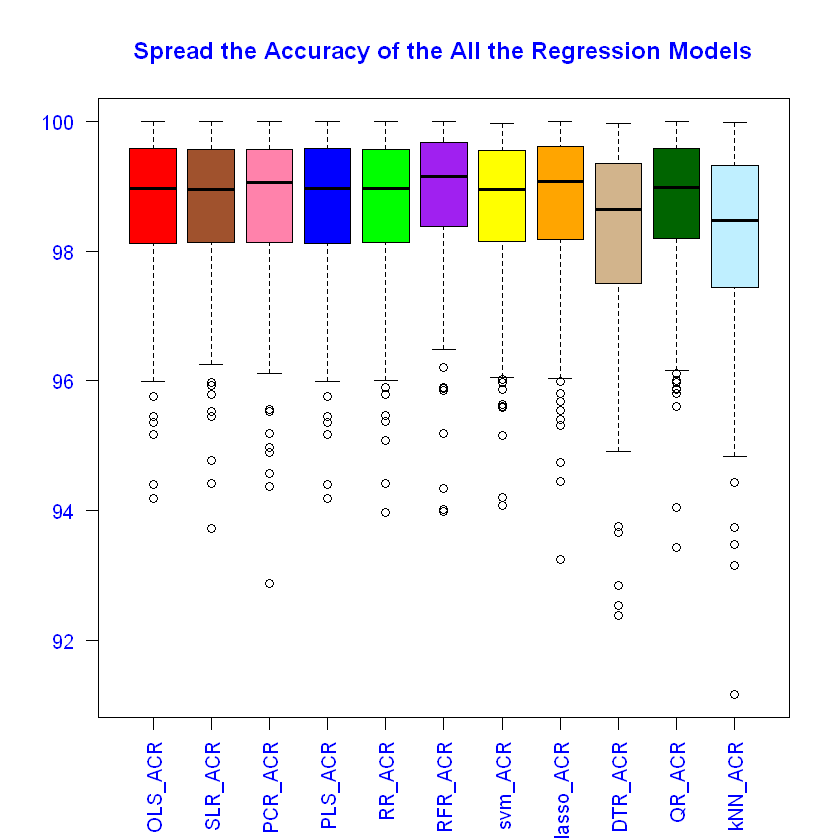

In [233]:
All_ACR <- cbind (OLS_ACR,SLR_ACR, PCR_ACR, PLS_ACR, RR_ACR, RFR_ACR, svm_ACR, lasso_ACR, DTR_ACR,QR_ACR, kNN_ACR)
boxplot(All_ACR, col.axis='blue', las = 2, 
        col = c("red","sienna","palevioletred1","blue","green","Purple","Yellow", 
"Orange","Tan", "darkgreen", "lightblue1"),col.main="blue",
        main = substitute(paste("Spread the Accuracy of the All the Regression Models")))

In [ ]:
All_se <- cbind (OLS_se,SLR_se, PCR_se, PLS_se, RR_se, RFR_se, svm_se, lasso_se, DTR_se,QR_se, kNN_se)
All_se<-as.data.frame(All_se)
names(All_se)[names(All_se) == 1] = "lasso_se"

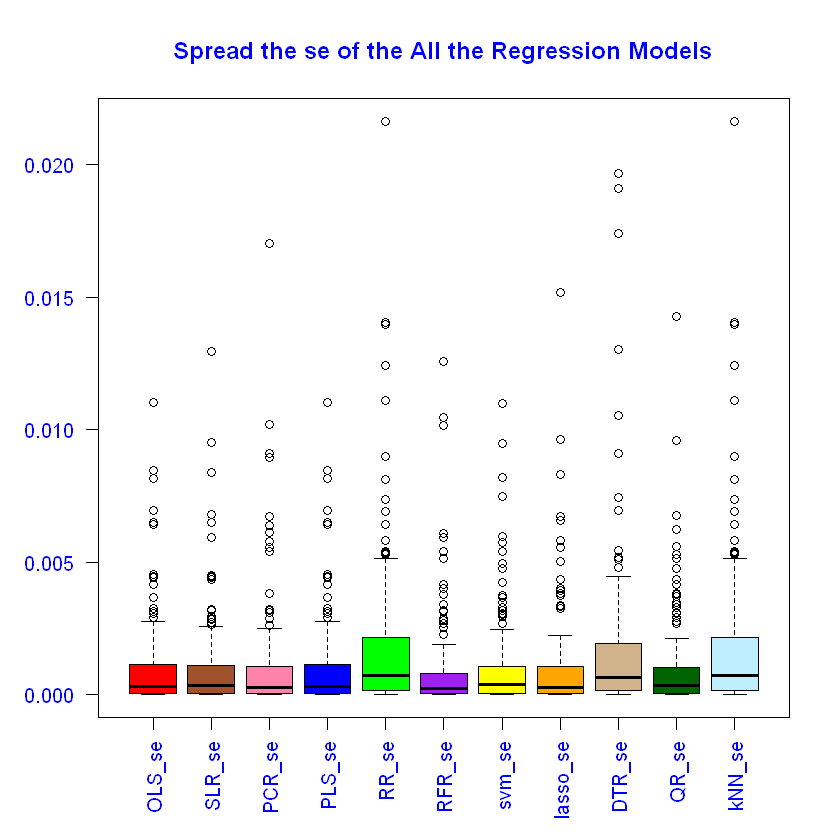

In [264]:
boxplot(All_se, col.axis='blue', las = 2, 
        col = c("red","sienna","palevioletred1","blue","green","Purple","Yellow", 
"Orange","Tan", "darkgreen", "lightblue1"),col.main="blue",
        main = substitute(paste("Spread the se of the All the Regression Models")))

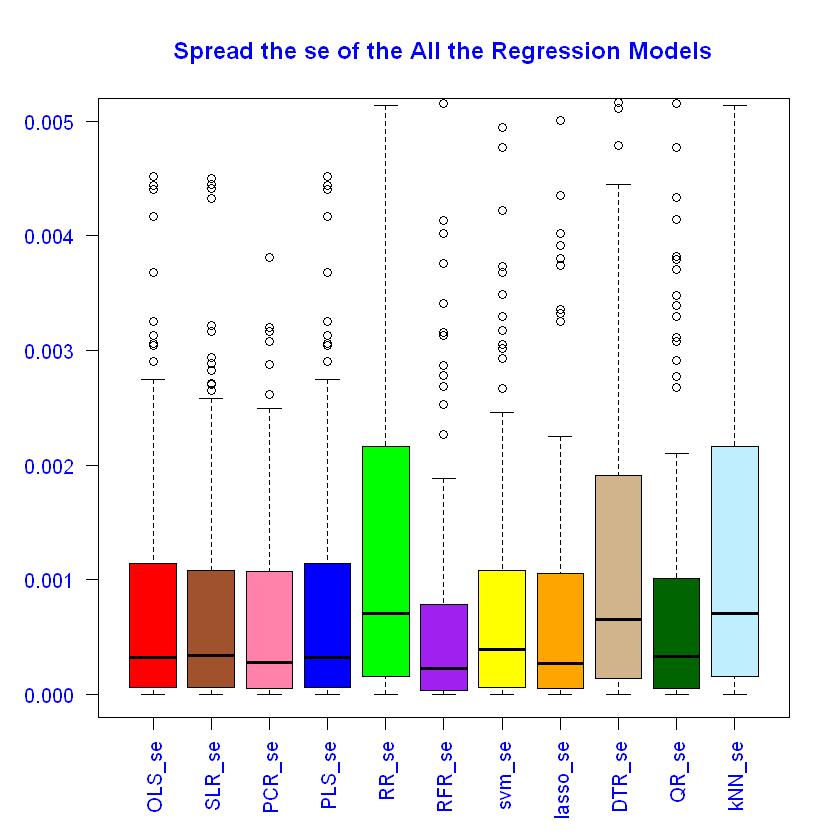

In [268]:
boxplot(All_se, ylim=c(0, 0.005), col.axis='blue', las = 2, 
        col = c("red","sienna","palevioletred1","blue","green","Purple","Yellow", 
"Orange","Tan", "darkgreen", "lightblue1"),col.main="blue",
        main = substitute(paste("Spread the se of the All the Regression Models")))

# 6. Conclusion

In [ ]:
Models<-function(fit){
  fit<-  
}

In [ ]:
#install.packages("pls") # for Principal Component Regression (PCR)
#install.packages('ridge') #for Ridge Regression
#install.packages("e1071") #for Support Vector Regression (SVR)
#install.packages("glmnet", repos = "http://cran.us.r-project.org") #for LASSO Regression

library(pls) # for Principal Component Regression (PCR)
library(pls) # for Partial Least Squares (PLS) Regression
library(ridge) #for Ridge Regression
library(randomForest) #Random Forest Regression
library(e1071) #for Support Vector Regression (SVR)
library(rpart) #for decision tree regression
library(rpart) # for NO bagging regression
library(quantreg) #for Quantile Regression
library(glmnet) #for LASSO Regression

# fit model
OLS_fit <- lm(ytraining$mpg~., xtraining) #Ordinary Least Squares (OLS) Regression
base <- lm(ytraining$mpg~., xtraining) #Stepwize Linear Regression (SLR)
SLR_fit <- step(base) #Stepwize Linear Regression (SLR)
PCR_fit <- pcr(ytraining$mpg~., data=xtraining, validation="CV") #Principal Component Regression (PCR)
PLS_fit <- plsr(ytraining$mpg~., data=xtraining, validation="CV") #Partial Least Squares (PLS) Regression
RR_fit <- linearRidge(ytraining$mpg~., data=xtraining) #Ridge Regression
RFR_fit <- randomForest(ytraining$mpg~., data=xtraining) #Random Forest Regression
SVR_fit <- svm(ytraining$mpg~ ., data=xtraining, method="C-classification", kernel="linear") #Support Vector Regression (SVR)
DTR_fit <- rpart(ytraining$mpg~., xtraining, method="anova") #Decision tree regression
NBR_fit <- rpart(ytraining$mpg~., xtraining) #NO bagging regression
QR_fit <- rq(ytraining$mpg~.,xtraining,tau = 0.25) #Quantile Regression
kNN_fit <- knnreg( xtraining, ytraining$mpg,k = 3) #kNN regression
lambda <- 10^seq(10, -2, length = 100) #for LASSO Regression
LR_fit <- glmnet(as.matrix(xtraining), ytraining$mpg, alpha = 0, lambda = lambda) #LASSO Regression

#predict
OLS_fit,SLR_fit,PCR_fit,PLS_fit,RR_fit,RFR_fit
predictions <- predict(OLS, xtest) # for OLS, SLR, RFR, SVR, No Bagging R, DTR, Quanrile R, kNN R
predictions <- predict(fit, xtest, ncomp=6) #for PCR, RR
predictions <- predict(fit, xtest, ncomp=7) #for PLS
lasso.pred  <- predict(lasso.mod, s = bestlam, newx = testx) #for LASSO R
#for mse
OLS_mse <- mean((ytest$mpg - predictions)^2)
#for ploting boxplot for se
OLS_se <- mean((ytest$mpg - predictions)^2)
# calculate accuracy
compare1 <- cbind (actual=ytest$mpg, predictions1)
OLS_accuracy<-mean (apply(compare1, 1, min)/apply(compare1, 1, max))
ACR<-(apply(compare1, 1, min)/apply(compare1, 1, max)) #for boxplot

In [ ]:
models=c(OLS_fit,SLR_fit,PCR_fit,PLS_fit,RR_fit,RFR_fit)

In [ ]:
lapply(models, summary)

In [ ]:
lapply(models, summary)